# Machine Learning Portfolio Risk and Returns

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [10]:
# input
# Machine Learning Stock
# symbols = ['GOOGL','MSFT','FB','AMZN','NFLX','CRM','ADBE','MTCH','IAC','TTD','FIVN','V','MA','PANW','IBM','FTNT','NVDA','INTC','CUB','IBM','ACN','EPAM']
symbols = ['GOOGL','MSFT','AMZN','NFLX','CRM','ADBE','MTCH','IAC','TTD','FIVN','V','MA','PANW','IBM','FTNT','NVDA','INTC','IBM','ACN','EPAM']
start = '2017-01-01'
end = '2019-01-01'

In [11]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [17]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [18]:
number_of_years = delta.years

In [19]:
days = (df.index[-1] - df.index[0]).days
days

727

In [20]:
df.head()

,GOOGL,MSFT,AMZN,NFLX,CRM,ADBE,MTCH,IAC,TTD,FIVN,V,MA,PANW,IBM,FTNT,NVDA,INTC,ACN,EPAM
Date,,,,,,,,,,,,,,,,,,,
2017-01-03,40.400501,57.375919,37.683498,127.489998,70.540001,103.480003,16.494013,14.692292,2.693,14.19,76.093674,101.493881,42.313332,117.996887,6.024,25.140347,30.488810,105.362442,63.660000
2017-01-04,40.388500,57.119205,37.859001,129.410004,72.800003,104.139999,16.455944,14.851328,2.710,14.20,76.715843,102.456894,42.666668,119.457787,6.084,25.726902,30.330538,105.615761,64.360001
2017-01-05,40.651001,57.119205,39.022499,131.809998,72.790001,105.910004,17.122175,15.108399,2.745,14.34,77.615562,103.248238,43.990002,119.062576,6.166,25.073809,30.280554,104.032494,64.750000
2017-01-06,41.260502,57.614304,39.799500,131.070007,73.800003,108.300003,17.160246,15.173756,2.770,14.78,78.687553,103.991302,45.016666,119.648369,6.202,25.408979,30.388851,105.217674,66.870003
2017-01-09,41.359001,57.430931,39.846001,130.949997,73.959999,108.570000,17.274456,15.202078,2.844,15.64,78.247276,103.788643,44.573334,118.321518,6.262,26.439140,30.497149,104.041557,66.839996


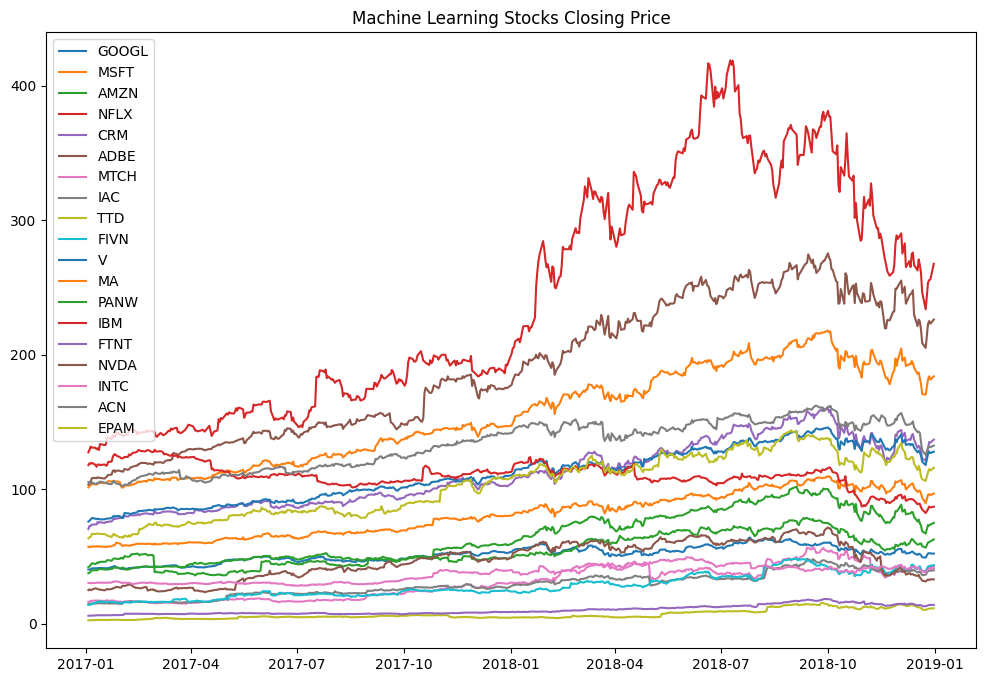

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Machine Learning Stocks Closing Price')
plt.legend(labels=df.columns)

In [22]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

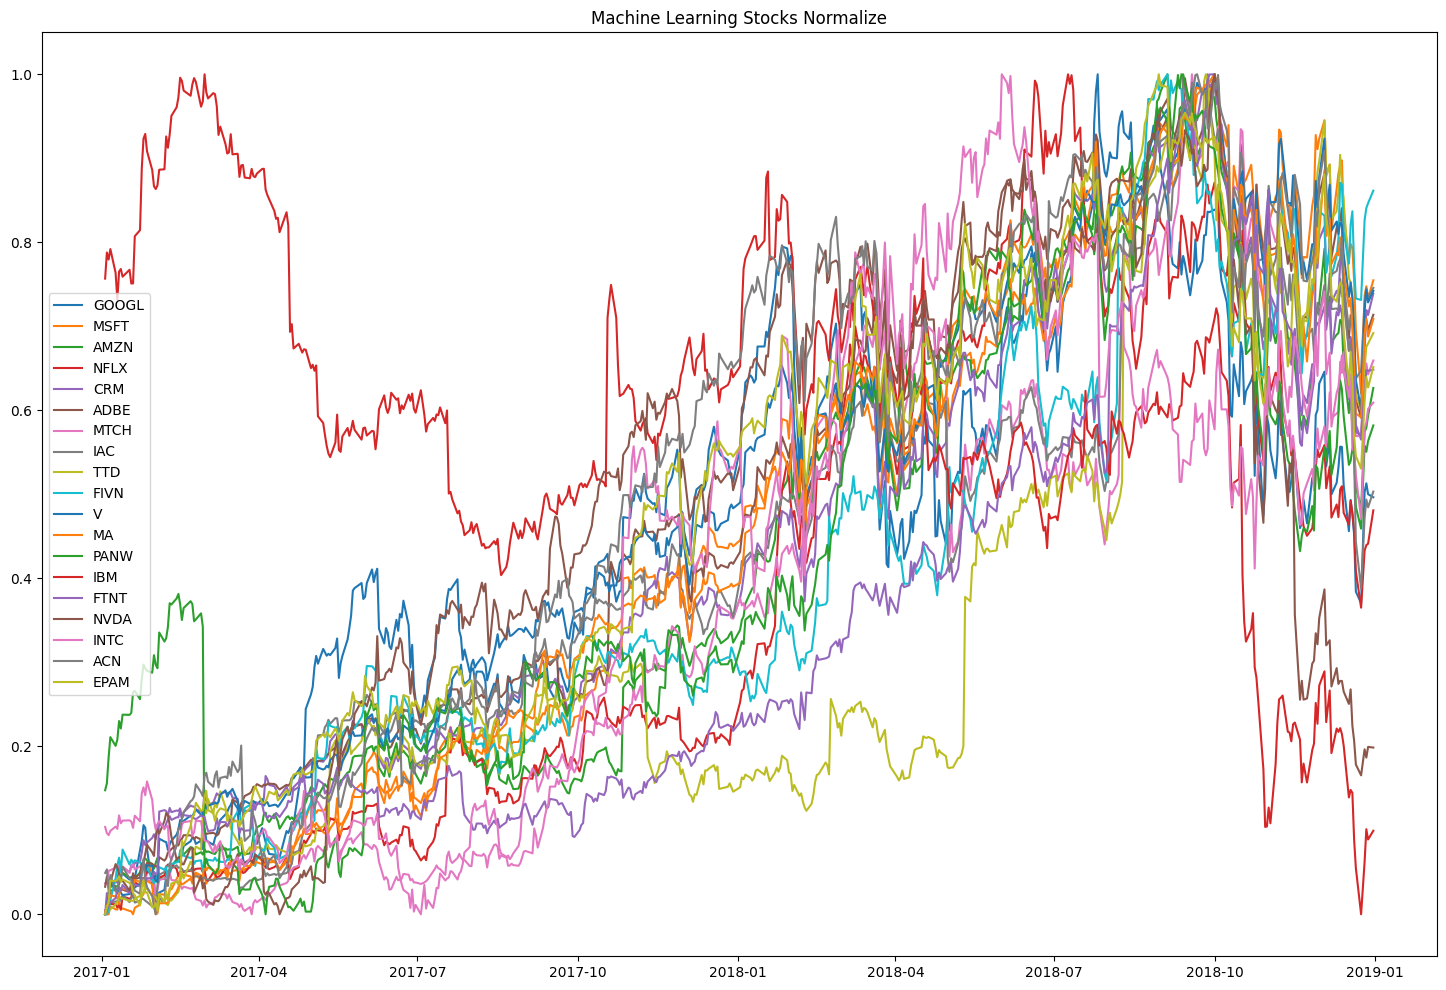

In [23]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Machine Learning Stocks Normalize')
plt.legend(labels=normalize.columns)

In [24]:
stock_rets = df.pct_change().dropna()

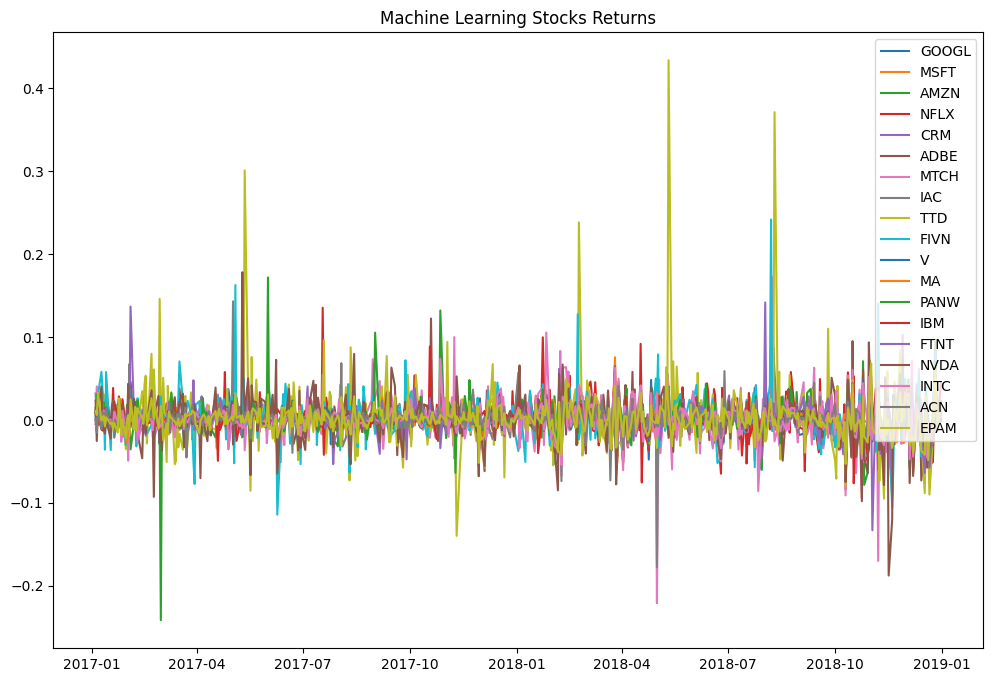

In [25]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Machine Learning Stocks Returns')
plt.legend(labels=stock_rets.columns)

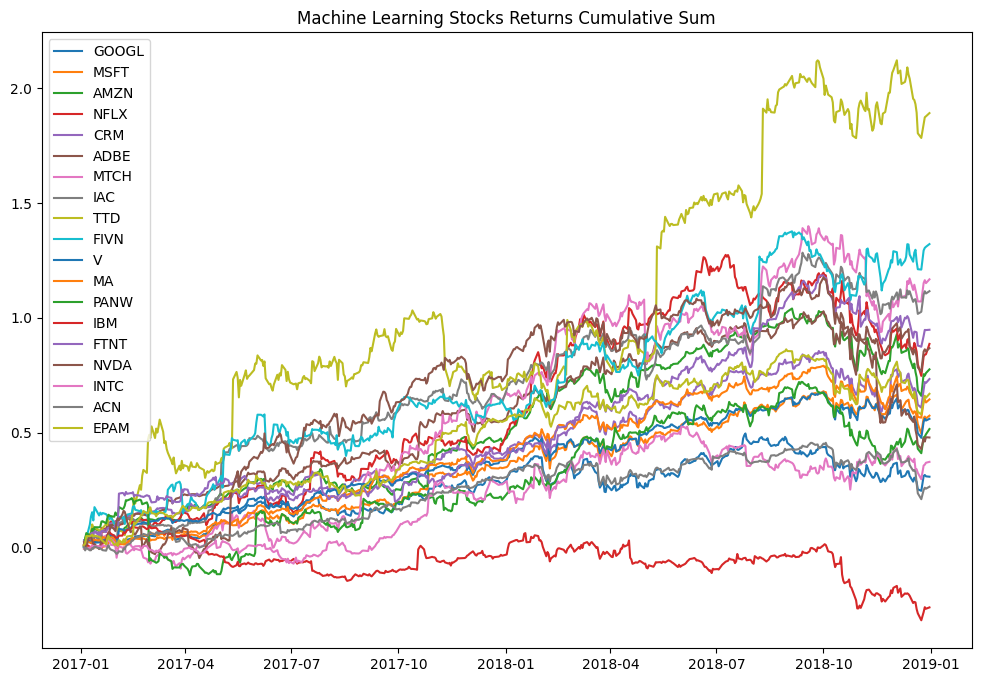

In [26]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Machine Learning Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

In [27]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

In [ ]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

NameError: name 'stock_rets' is not defined

In [ ]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

NameError: name 'stock_rets' is not defined

<Figure size 700x700 with 0 Axes>

In [ ]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

In [ ]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [ ]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

EPAM   EPAM     1.000000
TTD    TTD      1.000000
INTC   INTC     1.000000
NVDA   NVDA     1.000000
FTNT   FTNT     1.000000
IBM    IBM      1.000000
PANW   PANW     1.000000
MA     MA       1.000000
V      V        1.000000
IAC    IAC      1.000000
ACN    ACN      1.000000
MTCH   MTCH     1.000000
ADBE   ADBE     1.000000
CRM    CRM      1.000000
NFLX   NFLX     1.000000
AMZN   AMZN     1.000000
FB     FB       1.000000
MSFT   MSFT     1.000000
CUB    CUB      1.000000
FIVN   FIVN     1.000000
GOOGL  GOOGL    1.000000
MA     V        0.892900
V      MA       0.892900
MTCH   IAC      0.786228
IAC    MTCH     0.786228
CRM    ADBE     0.785597
ADBE   CRM      0.785597
CRM    MA       0.781389
MA     CRM      0.781389
MSFT   V        0.777083
                  ...   
TTD    FIVN     0.245916
FIVN   TTD      0.245916
CUB    IBM      0.245631
IBM    CUB      0.245631
FIVN   CUB      0.244070
CUB    FIVN     0.244070
TTD    NVDA     0.230372
NVDA   TTD      0.230372
CUB    FB       0.220368


In [ ]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,GOOGL,MSFT,FB,AMZN,NFLX,CRM,ADBE,MTCH,IAC,TTD,...,V,MA,PANW,IBM,FTNT,NVDA,INTC,CUB,ACN,EPAM
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,0.448891,0.383439,0.732522,0.393867,0.475429,0.627588,0.427781,0.555197,0.587599,0.254630,...,0.478502,0.553318,0.604241,0.537590,0.520225,0.576488,0.421603,0.582652,0.570820,0.434195
2017-01-05,0.506997,0.417845,0.736170,0.517822,0.490618,0.458039,0.480143,0.663876,0.607814,0.266139,...,0.508544,0.539717,0.659046,0.442458,0.533028,0.443317,0.440115,0.273118,0.438834,0.400648
2017-01-06,0.579618,0.484498,0.757669,0.466382,0.385336,0.531879,0.507609,0.566706,0.567343,0.259501,...,0.526173,0.535660,0.640483,0.492351,0.505226,0.549251,0.467406,0.387046,0.639017,0.581980
2017-01-09,0.471840,0.393372,0.719724,0.377282,0.405810,0.470187,0.408624,0.577961,0.559677,0.290194,...,0.362010,0.465174,0.560236,0.395281,0.519185,0.623540,0.467344,0.457025,0.467764,0.356416
2017-01-10,0.439338,0.415390,0.660924,0.365643,0.374526,0.460188,0.382250,0.579249,0.559666,0.269369,...,0.363812,0.463713,0.601409,0.385485,0.559529,0.492071,0.438734,0.532946,0.556535,0.370650


In [ ]:
Normalized_Value.corr()

,GOOGL,MSFT,FB,AMZN,NFLX,CRM,ADBE,MTCH,IAC,TTD,...,V,MA,PANW,IBM,FTNT,NVDA,INTC,CUB,ACN,EPAM
GOOGL,1.000000,0.771586,0.640550,0.719742,0.602570,0.699130,0.675725,0.368385,0.431154,0.319827,...,0.737875,0.714641,0.364781,0.425271,0.484578,0.559668,0.533903,0.332338,0.588746,0.571456
MSFT,0.771586,1.000000,0.547119,0.738228,0.609286,0.752413,0.770251,0.354319,0.411753,0.337338,...,0.777083,0.773570,0.375190,0.459310,0.529380,0.529161,0.605375,0.365568,0.667848,0.572117
FB,0.640550,0.547119,1.000000,0.590811,0.486307,0.522392,0.493976,0.342744,0.372240,0.289511,...,0.557580,0.584230,0.284690,0.254803,0.362659,0.472328,0.406506,0.220368,0.383739,0.394378
AMZN,0.719742,0.738228,0.590811,1.000000,0.644157,0.690820,0.648191,0.364880,0.431046,0.355095,...,0.672126,0.709773,0.366557,0.341746,0.426744,0.523415,0.481682,0.263359,0.526520,0.536802
NFLX,0.602570,0.609286,0.486307,0.644157,1.000000,0.628014,0.590377,0.383384,0.417863,0.291443,...,0.617772,0.607967,0.406267,0.323364,0.466309,0.498667,0.454671,0.265071,0.457673,0.496877
CRM,0.699130,0.752413,0.522392,0.690820,0.628014,1.000000,0.785597,0.440203,0.502546,0.366959,...,0.771157,0.781389,0.437981,0.386509,0.583155,0.549895,0.481022,0.346299,0.569139,0.589638
ADBE,0.675725,0.770251,0.493976,0.648191,0.590377,0.785597,1.000000,0.397581,0.452810,0.358018,...,0.743943,0.718496,0.400318,0.393894,0.557200,0.534651,0.469750,0.332117,0.556661,0.582843
MTCH,0.368385,0.354319,0.342744,0.364880,0.383384,0.440203,0.397581,1.000000,0.786228,0.289128,...,0.397208,0.379119,0.270165,0.165667,0.372520,0.336972,0.282441,0.267054,0.275456,0.346317
IAC,0.431154,0.411753,0.372240,0.431046,0.417863,0.502546,0.452810,0.786228,1.000000,0.387182,...,0.473497,0.455092,0.326356,0.217917,0.421267,0.370356,0.309624,0.285079,0.339965,0.389252
TTD,0.319827,0.337338,0.289511,0.355095,0.291443,0.366959,0.358018,0.289128,0.387182,1.000000,...,0.359367,0.359957,0.210500,0.159211,0.298966,0.230372,0.205115,0.190216,0.278909,0.326512


In [ ]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

EPAM   EPAM     1.000000
TTD    TTD      1.000000
INTC   INTC     1.000000
NVDA   NVDA     1.000000
FTNT   FTNT     1.000000
IBM    IBM      1.000000
PANW   PANW     1.000000
MA     MA       1.000000
V      V        1.000000
IAC    IAC      1.000000
ACN    ACN      1.000000
MTCH   MTCH     1.000000
ADBE   ADBE     1.000000
CRM    CRM      1.000000
NFLX   NFLX     1.000000
AMZN   AMZN     1.000000
FB     FB       1.000000
MSFT   MSFT     1.000000
CUB    CUB      1.000000
FIVN   FIVN     1.000000
GOOGL  GOOGL    1.000000
MA     V        0.892900
V      MA       0.892900
MTCH   IAC      0.786228
IAC    MTCH     0.786228
CRM    ADBE     0.785597
ADBE   CRM      0.785597
CRM    MA       0.781389
MA     CRM      0.781389
MSFT   V        0.777083
                  ...   
TTD    FIVN     0.245916
FIVN   TTD      0.245916
CUB    IBM      0.245631
IBM    CUB      0.245631
FIVN   CUB      0.244070
CUB    FIVN     0.244070
TTD    NVDA     0.230372
NVDA   TTD      0.230372
CUB    FB       0.220368


In [ ]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
GOOGL    0.000615
MSFT     0.001146
FB       0.000408
AMZN     0.001549
NFLX     0.001770
CRM      0.001465
ADBE     0.001733
MTCH     0.002332
IAC      0.002229
TTD      0.003777
FIVN     0.002638
V        0.001119
MA       0.001288
PANW     0.001030
IBM     -0.000521
FTNT     0.001893
NVDA     0.000956
INTC     0.000745
CUB      0.000430
ACN      0.000529
EPAM     0.001336
dtype: float64
--------------------------------------------------
Stock risks:
GOOGL    0.014273
MSFT     0.014212
FB       0.018601
AMZN     0.018599
NFLX     0.024110
CRM      0.016717
ADBE     0.018543
MTCH     0.028996
IAC      0.021549
TTD      0.043501
FIVN     0.028332
V        0.012656
MA       0.014115
PANW     0.021671
IBM      0.013002
FTNT     0.019859
NVDA     0.028336
INTC     0.016951
CUB      0.020920
ACN      0.011893
EPAM     0.016664
dtype: float64


In [ ]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
IBM,-0.000521,0.013002
FB,0.000408,0.018601
CUB,0.000430,0.020920
ACN,0.000529,0.011893
GOOGL,0.000615,0.014273
INTC,0.000745,0.016951
NVDA,0.000956,0.028336
PANW,0.001030,0.021671
V,0.001119,0.012656
MSFT,0.001146,0.014212


In [ ]:
table.sort_values(by='Risk')

,Returns,Risk
ACN,0.000529,0.011893
V,0.001119,0.012656
IBM,-0.000521,0.013002
MA,0.001288,0.014115
MSFT,0.001146,0.014212
GOOGL,0.000615,0.014273
EPAM,0.001336,0.016664
CRM,0.001465,0.016717
INTC,0.000745,0.016951
ADBE,0.001733,0.018543


In [ ]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
GOOGL,0.000615,0.014273,-0.657515
MSFT,0.001146,0.014212,-0.623003
FB,0.000408,0.018601,-0.515678
AMZN,0.001549,0.018599,-0.454387
NFLX,0.001770,0.024110,-0.341342
CRM,0.001465,0.016717,-0.510572
ADBE,0.001733,0.018543,-0.445825
MTCH,0.002332,0.028996,-0.264458
IAC,0.002229,0.021549,-0.360636
TTD,0.003777,0.043501,-0.143054


In [ ]:
table['Max Returns'] = rets.max()

In [ ]:
table['Min Returns'] = rets.min()

In [ ]:
table['Median Returns'] = rets.median()

In [ ]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
GOOGL,0.000615,0.014273,-0.657515,0.064164,-0.052802,0.001230,-0.164338
MSFT,0.001146,0.014212,-0.623003,0.075705,-0.054338,0.001430,1.175420
FB,0.000408,0.018601,-0.515678,0.090613,-0.189609,0.001056,-1.584085
AMZN,0.001549,0.018599,-0.454387,0.132164,-0.078197,0.001709,1.620408
NFLX,0.001770,0.024110,-0.341342,0.135436,-0.094039,0.000892,4.522031
CRM,0.001465,0.016717,-0.510572,0.102713,-0.087061,0.001771,1.700333
ADBE,0.001733,0.018543,-0.445825,0.122418,-0.080372,0.002196,1.393806
MTCH,0.002332,0.028996,-0.264458,0.172840,-0.220925,0.002493,1.663894
IAC,0.002229,0.021549,-0.360636,0.143129,-0.177686,0.001866,1.026603
TTD,0.003777,0.043501,-0.143054,0.433909,-0.139760,0.002027,1.406729


In [ ]:
table['Average Return Yearly'] = (1 + total_return)**(1 / number_of_years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
GOOGL,0.000615,0.014273,-0.657515,0.064164,-0.052802,0.001230,-0.164338,-0.000822
MSFT,0.001146,0.014212,-0.623003,0.075705,-0.054338,0.001430,1.175420,0.005860
FB,0.000408,0.018601,-0.515678,0.090613,-0.189609,0.001056,-1.584085,-0.007952
AMZN,0.001549,0.018599,-0.454387,0.132164,-0.078197,0.001709,1.620408,0.008069
NFLX,0.001770,0.024110,-0.341342,0.135436,-0.094039,0.000892,4.522031,0.022360
CRM,0.001465,0.016717,-0.510572,0.102713,-0.087061,0.001771,1.700333,0.008466
ADBE,0.001733,0.018543,-0.445825,0.122418,-0.080372,0.002196,1.393806,0.006945
MTCH,0.002332,0.028996,-0.264458,0.172840,-0.220925,0.002493,1.663894,0.008285
IAC,0.002229,0.021549,-0.360636,0.143129,-0.177686,0.001866,1.026603,0.005120
TTD,0.003777,0.043501,-0.143054,0.433909,-0.139760,0.002027,1.406729,0.007009


In [ ]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
GOOGL,0.000615,0.014273,-0.657515,0.064164,-0.052802,0.001230,-0.164338,-0.000822,0.093233
MSFT,0.001146,0.014212,-0.623003,0.075705,-0.054338,0.001430,1.175420,0.005860,0.198988
FB,0.000408,0.018601,-0.515678,0.090613,-0.189609,0.001056,-1.584085,-0.007952,0.040634
AMZN,0.001549,0.018599,-0.454387,0.132164,-0.078197,0.001709,1.620408,0.008069,0.270015
NFLX,0.001770,0.024110,-0.341342,0.135436,-0.094039,0.000892,4.522031,0.022360,0.293159
CRM,0.001465,0.016717,-0.510572,0.102713,-0.087061,0.001771,1.700333,0.008466,0.258622
ADBE,0.001733,0.018543,-0.445825,0.122418,-0.080372,0.002196,1.393806,0.006945,0.311459
MTCH,0.002332,0.028996,-0.264458,0.172840,-0.220925,0.002493,1.663894,0.008285,0.391361
IAC,0.002229,0.021549,-0.360636,0.143129,-0.177686,0.001866,1.026603,0.005120,0.413542
TTD,0.003777,0.043501,-0.143054,0.433909,-0.139760,0.002027,1.406729,0.007009,0.659274


In [ ]:
table.sort_values(by='Average Return Yearly')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
FB,0.000408,0.018601,-0.515678,0.090613,-0.189609,0.001056,-1.584085,-0.007952,0.040634
GOOGL,0.000615,0.014273,-0.657515,0.064164,-0.052802,0.001230,-0.164338,-0.000822,0.093233
NVDA,0.000956,0.028336,-0.319160,0.178259,-0.187559,0.001654,-0.112232,-0.000561,0.100283
FTNT,0.001893,0.019859,-0.408216,0.141796,-0.132991,0.002306,0.127956,0.000640,0.342372
INTC,0.000745,0.016951,-0.546021,0.105519,-0.085890,0.000754,0.385032,0.001923,0.110117
IBM,-0.000521,0.013002,-0.809147,0.088645,-0.076282,0.000212,0.566223,0.002827,-0.099870
V,0.001119,0.012656,-0.701735,0.069827,-0.048391,0.001905,0.763706,0.003811,0.197632
CUB,0.000430,0.020920,-0.457448,0.135514,-0.117994,0.000000,0.825517,0.004119,0.037490
ACN,0.000529,0.011893,-0.796362,0.058967,-0.072826,0.001374,0.851080,0.004246,0.082661
IAC,0.002229,0.021549,-0.360636,0.143129,-0.177686,0.001866,1.026603,0.005120,0.413542
